# Dataset Dummy : Water Temperature dan Turbidity  
Nama : Farhan Nawwafal Pramudia  
Team : 7  
Role : Data

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1 : Bagaimana rata-rata suhu per jam selama tahun 2023?
- Pertanyaan 2 : Bagaimana rata-rata kekeruhan air per jam selama tahun 2023?
- Pertanyaan 3 : Pada jam berapa suhu memiliki tingkat tertinggi dan terendah ?

## Menyiapkan semua library yang dibutuhkan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

Membaca dataset `temp_turb_df`

In [21]:
df = pd.read_csv('/content/Water_Temperature_Turbidity_Data.csv', delimiter=',')
df.head()

,Timestamp,Water_Temperature_C,Turbidity_NTU
0,2023-01-01 00:00:00,13.982258,3.696572
1,2023-01-01 01:00:00,17.129941,3.566647
2,2023-01-01 02:00:00,19.103928,1.126960
3,2023-01-01 03:00:00,22.236695,4.159168
4,2023-01-01 04:00:00,25.456022,0.019835


### Assesing Data

Menilai tabel `temp_turb_df`

In [3]:
# Mengecek informasi dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Timestamp            10000 non-null  object 
 1   Water_Temperature_C  10000 non-null  float64
 2   Turbidity_NTU        10000 non-null  float64
dtypes: float64(2), object(1)
memory usage: 234.5+ KB


Insight : Berdasarkan informasi di atas, tidak ada data yang null, namun tipe data dari Timestamp masih kurang tepat. Hal ini akan diperbaiki pada proses Cleaning Data

In [4]:
# Mengecek summary statistik dataset
df.describe()

,Water_Temperature_C,Turbidity_NTU
count,10000.000000,10000.000000
mean,15.101295,3.228379
std,7.109117,2.227754
min,5.000000,0.000000
25%,8.208789,1.655042
50%,15.061432,3.051622
75%,21.910346,4.465937
max,28.937958,15.000000


In [5]:
# Memastikan tidak ada data yang null
print(df.isna().sum())

Timestamp              0
Water_Temperature_C    0
Turbidity_NTU          0
dtype: int64


In [6]:
# Mengecek jumlah duplikat data
print(f'Jumlah duplikasi data : {df.duplicated().sum()}')

Jumlah duplikasi data : 0


### Cleaning Data

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Timestamp            10000 non-null  object 
 1   Water_Temperature_C  10000 non-null  float64
 2   Turbidity_NTU        10000 non-null  float64
dtypes: float64(2), object(1)
memory usage: 234.5+ KB


In [8]:
# Memperbaiki tipe data Timestamp menjadi datetime
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Timestamp            10000 non-null  datetime64[ns]
 1   Water_Temperature_C  10000 non-null  float64       
 2   Turbidity_NTU        10000 non-null  float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 234.5 KB


Insight : Sekarang, tipe datanya sudah benar dan datanya sudah clean

## Exploratory Data Analysis (EDA)

### Explore rata-rata suhu per jam pada tahun 2023

In [10]:
# Menambahkan kolom hour
df['Hour'] = df['Timestamp'].dt.hour
df.head()

,Timestamp,Water_Temperature_C,Turbidity_NTU,Hour
0,2023-01-01 00:00:00,13.982258,3.696572,0
1,2023-01-01 01:00:00,17.129941,3.566647,1
2,2023-01-01 02:00:00,19.103928,1.126960,2
3,2023-01-01 03:00:00,22.236695,4.159168,3
4,2023-01-01 04:00:00,25.456022,0.019835,4


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Timestamp            10000 non-null  datetime64[ns]
 1   Water_Temperature_C  10000 non-null  float64       
 2   Turbidity_NTU        10000 non-null  float64       
 3   Hour                 10000 non-null  int32         
dtypes: datetime64[ns](1), float64(2), int32(1)
memory usage: 273.6 KB


In [12]:
# Mengambil data suhu per jam
avg_hour_temp_df = df.groupby('Hour')['Water_Temperature_C'].mean().reset_index()
avg_hour_temp_df.rename(columns={'Water_Temperature_C' : 'Average_Hour_Temperature(°C)'}).head()

,Hour,Average_Hour_Temperature(°C)
0,0,15.106207
1,1,17.546047
2,2,19.843285
3,3,22.128231
4,4,23.681947


### Explore rata-rata kekeruhan air per jam selama tahun 2023

In [13]:
# Mengelompokkan data kekeruhan air perjam selama tahun 2023
avg_hour_turb_df = df.groupby('Hour')['Turbidity_NTU'].mean().reset_index()
avg_hour_turb_df.rename(columns={'Turbidity_NTU' : 'Average_Hour_Turbidity'}).head()

,Hour,Average_Hour_Turbidity
0,0,3.028041
1,1,3.081672
2,2,3.295168
3,3,3.160252
4,4,3.248188


## Visualization & Explanatory Analysis

### Pertanyaan 1 : Bagaimana rata-rata suhu per jam selama tahun 2023?

In [14]:
# Fungsi menampilkan label suhu
def showLabelsTemperature(your_data, x_column, y_column):
  for i in range(len(your_data)):
      plt.text(
          x=your_data[x_column].iloc[i] + 0.8,  # Mengambil value untuk sumbu x
          y=your_data[y_column].iloc[i] + 0.4,  # Offset label
          s=f"{your_data[y_column].iloc[i]:.2f}",  # Format angka
          ha='center', fontsize=9
      )

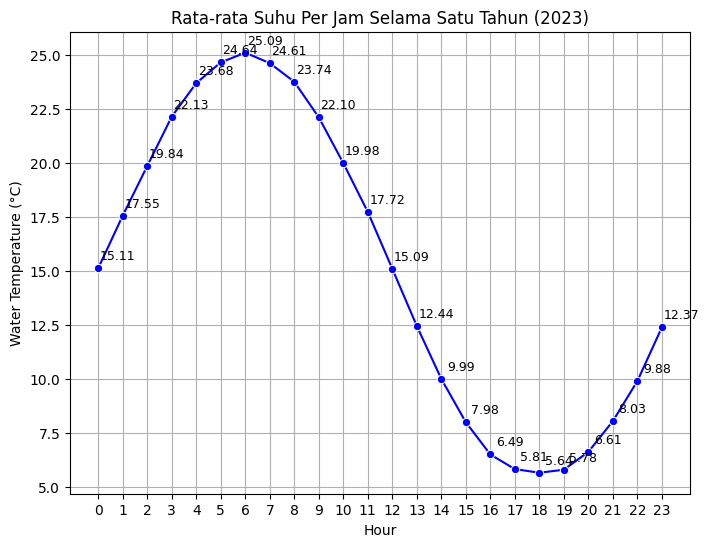

In [15]:
plt.figure(figsize=(8, 6))

# Membuat line chart dengan Seaborn
sns.lineplot(
    data=avg_hour_temp_df,
    x='Hour',
    y='Water_Temperature_C',
    marker='o',
    color='b'
)

showLabelsTemperature(avg_hour_temp_df, 'Hour', 'Water_Temperature_C')

plt.title('Rata-rata Suhu Per Jam Selama Satu Tahun (2023)')
plt.xlabel('Hour')
plt.ylabel('Water Temperature (°C)')
plt.xticks(range(0, 24))
plt.grid(True)

plt.show()

### Pertanyaan 2 : Bagaimana rata-rata kekeruhan air per jam selama tahun 2023?

In [16]:
# Fungsi menampilkan label turbidity
def showLabelsTurbidity(your_data, x_column, y_column):
  for i in range(len(your_data)):
      plt.text(
          x=your_data[x_column].iloc[i] + 0.3,  # Mengambil value untuk sumbu x
          y=your_data[y_column].iloc[i] + 0.009,  # Offset label
          s=f"{your_data[y_column].iloc[i]:.2f}",  # Format angka
          ha='center', fontsize=9
      )

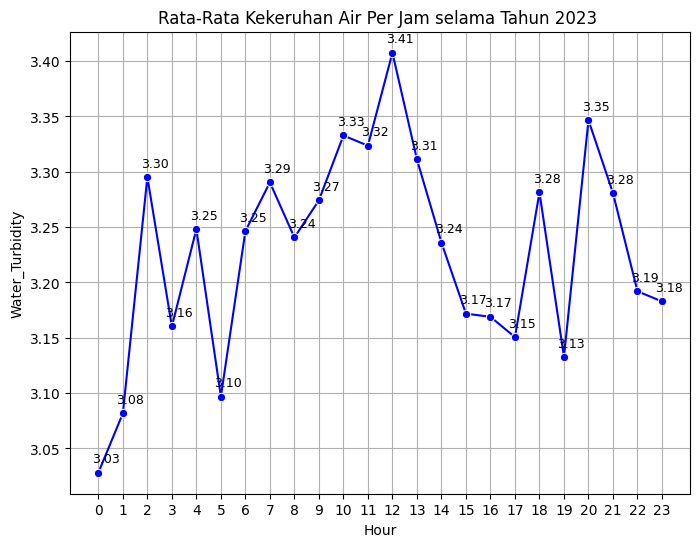

In [17]:
plt.figure(figsize=(8, 6))

sns.lineplot(
    data=avg_hour_turb_df,
    x='Hour',
    y='Turbidity_NTU',
    marker='o',
    color='b'
)

showLabelsTurbidity(avg_hour_turb_df, 'Hour', 'Turbidity_NTU')

plt.title('Rata-Rata Kekeruhan Air Per Jam selama Tahun 2023 ')
plt.xlabel('Hour')
plt.ylabel('Water_Turbidity')
plt.xticks(range(0, 24))
plt.grid(True)
plt.show()

### Pertanyaan 3 : Pada jam berapa suhu memiliki tingkat tertinggi dan terendah ?

In [18]:
# Mengambil suhu tertinggi dan terendah
max_temp = avg_hour_temp_df['Water_Temperature_C'].max()
min_temp = avg_hour_temp_df['Water_Temperature_C'].min()

In [19]:
# Mencari index jam ketika suhu max dan min
idx_max_temp = avg_hour_temp_df.loc[avg_hour_temp_df['Water_Temperature_C'].idxmax(), 'Hour']
idx_min_temp = avg_hour_temp_df.loc[avg_hour_temp_df['Water_Temperature_C'].idxmin(), 'Hour']

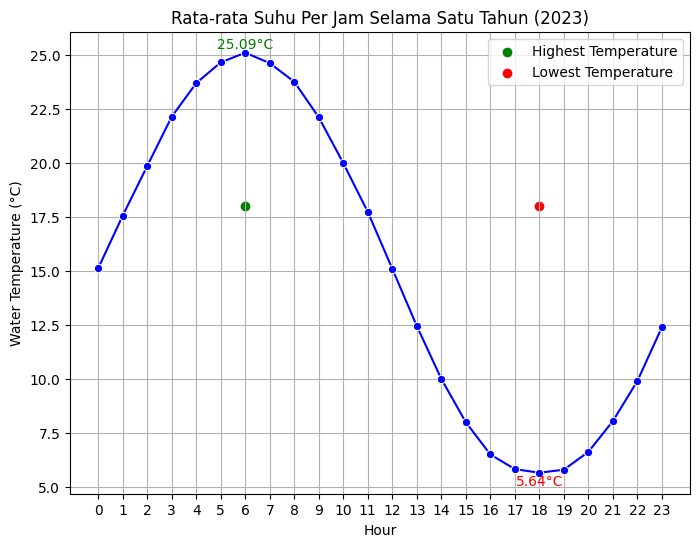

In [20]:
# Membuat line chart
plt.figure(figsize=(8, 6))
sns.lineplot(
    data=avg_hour_temp_df,
    x='Hour',
    y='Water_Temperature_C',
    marker='o',
    color='b'
)

# Menambahkan labels untuk suhu tertinggi dan terendah.
plt.scatter(idx_max_temp, idx_min_temp, color='green', label='Highest Temperature')
plt.scatter(idx_min_temp, idx_min_temp, color='red', label='Lowest Temperature')

# Menambahkan Label pada titik untuk suhu tertinggi dan terendah
plt.text(idx_max_temp, max_temp + 0.2, f'{max_temp:.2f}°C', color='green', ha = 'center')
plt.text(idx_min_temp, min_temp - 0.6, f'{min_temp:.2f}°C', color='red', ha = 'center')

plt.title('Rata-rata Suhu Per Jam Selama Satu Tahun (2023)')
plt.xlabel('Hour')
plt.ylabel('Water Temperature (°C)')
plt.xticks(range(0, 24))
plt.grid(True)
plt.legend()

# Tampilkan Plot
plt.show()

## Conclusion

- Conclusion pertanyaan 1 : Rata-rata suhu pada **jam 00.00 hingga 06.00**, suhu **cenderung naik** terlebih dahulu. Namun saat **jam 07.00 hingga 18.00**, suhu **cenderung mulai menurun perlahan**.  
- Conclusion pertanyaan 2 : Berdasarkan visualisasi data di atas, rata-rata untuk tingkat kekeruhan air **cenderung susah untuk ditemukan polanya**. Namun **rata-ratanya bertahan di angka 3**.
- Conclusion pertanyaan 3 : Berdasarkan visualisasi data di atas, terlihat jelas bahwa selama tahun 2023, suhu tertinggi selalu berada pada jam 06.00. Sedangkan untuk suhu terendah, berada pada jam 18.00